In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_labels.shape

(10000,)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
train_images[1].shape

(28, 28)

In [8]:
train_labels[1]

0

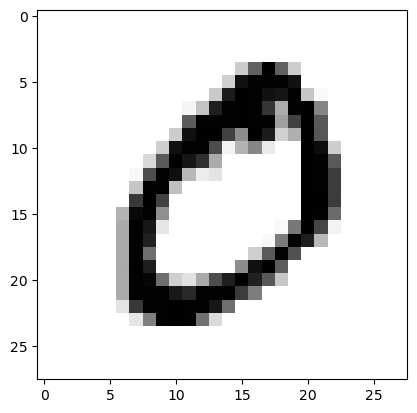

In [9]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                            layers.Dense(512, activation="relu"), # working on linearity + non linearity
                            layers.Dense(10, activation="softmax")
                            ])

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) # reverse direction ma weight ko change karta hy

In [13]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype("float32") / 255

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9248 - loss: 0.2633
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9680 - loss: 0.1083
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9787 - loss: 0.0717
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9845 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9880 - loss: 0.0389


In [15]:
# sequatial layers : one | two | three .....

# evaluate on test data

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9808 - loss: 0.0663


In [18]:
test_acc

0.9807999730110168

In [19]:
test_loss

0.06627831608057022

In [20]:
test_labels[7]

9

In [21]:
inp = test_images[9].reshape(1,784)

In [22]:
inp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [23]:
model.predict(inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[1.0125578e-10, 3.4812982e-11, 4.5043701e-11, 1.5373423e-07,
        2.9709085e-03, 3.2372955e-09, 3.5249945e-12, 1.2381347e-03,
        1.1188671e-05, 9.9577951e-01]], dtype=float32)

In [24]:
model.predict(inp).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


9

In [25]:
test_digits=test_images[0:10]
prediction = network.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [26]:
for i in prediction:
    print(i.argmax())

1
6
1
1
1
1
1
6
1
1


In [27]:
test_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

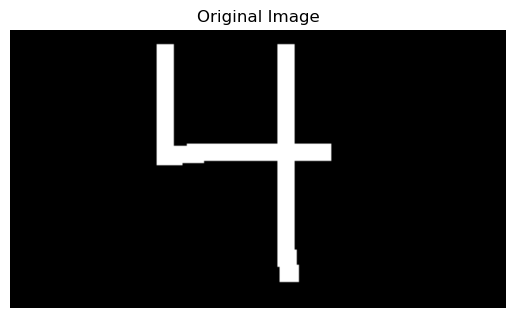

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r'four.png'
original_image = Image.open(img_path)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.show()


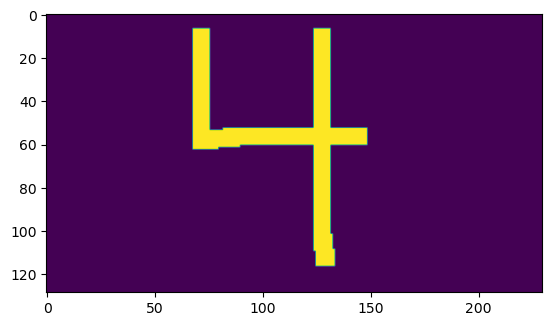

In [31]:
# Convert to grayscale
grayscale_img = original_image.convert('L')
plt.imshow(grayscale_img)
# ✅ Resize to 28x28 (MNIST standard size)
grayscale_img = grayscale_img.resize((28, 28))

In [32]:
# Convert to numpy array and normalize
grayscale_array = np.array(grayscale_img) / 255.0
# ✅ Flatten to (1, 784)
grayscale_array = grayscale_array.reshape(1, 784)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


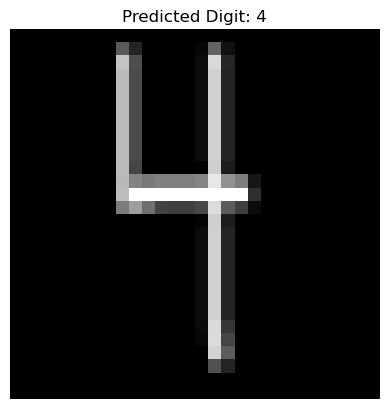

🧠 Model Prediction: 4


In [35]:

# --- Step 3: Predict ---
prediction = model.predict(grayscale_array)
predicted_digit = np.argmax(prediction)

# --- Step 4: Show Result ---
plt.imshow(grayscale_img, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()

print(f"🧠 Model Prediction: {predicted_digit}")

In [38]:
model.save('digit_model.h5')
print("✅ Model saved successfully as 'digit_model.h5'")

✅ Model saved successfully as 'digit_model.h5'
